

{% include toc title="In This Lesson" icon="file-text" %}






In [2]:
import earthlab as et
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.ion()

In [3]:
os.chdir('/Users/choldgraf/earth-analytics/')

In [5]:
precip_boulder = pd.read_csv('data/week_02-hw/precipitation/805325-precip-daily-2003-2013.csv', parse_dates=['DATE'])

In [6]:
precip_boulder_daily = precip_boulder.groupby('DATE').aggregate(
    {'HPCP': 'sum', 'STATION': 'first', 'ELEVATION': 'first',
     'STATION_NAME': 'first', 'LATITUDE': 'first', 'LONGITUDE': 'first'})
precip_boulder_daily = precip_boulder_daily.rename(columns={'HPCP': 'DAILY_PRECIP'})
precip_boulder_daily.head()

,ELEVATION,STATION,STATION_NAME,DAILY_PRECIP,LONGITUDE,LATITUDE
DATE,,,,,,
2003-01-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389
2003-02-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389
2003-02-02 19:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.2,-105.28111,40.03389
2003-02-02 22:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389
2003-02-03 02:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389


In [22]:
# ``` {r daily-summ, eval=F, echo=F}



# # the data processing workflow

# library(dplyr)

# library(lubridate)



# # import precip data into R data.frame

# precip_boulder <- read.csv("data/week2/precipitation/805325-precip-daily-2003-2013.csv",

#                            header = TRUE,

#                            na.strings = c(999.99))



# # convert time

# precip_boulder$DATE <- as.Date(precip_boulder$DATE, # convert to Date class

#                                   format="%Y%m%d %H:%M")

#                                   #DATE in the format: YearMonthDay Hour:Minute



# precip_boulder_daily <- precip_boulder %>%

#     group_by(DATE) %>% # summarize on the date column

#     summarize(DAILY_PRECIP = sum(HPCP, na.rm=TRUE), # sum up rainfall for each day

#               STATION = first(STATION), STATION_NAME= first(STATION_NAME),

#               ELEVATION= first(ELEVATION), LATITUDE= first(LATITUDE),

#               LONGITUDE= first(LONGITUDE))

In [7]:
precip_boulder_daily['YEAR'] = precip_boulder_daily.index.year
precip_boulder_daily['JULIAN'] = precip_boulder_daily.index.date
precip_boulder_daily.head()

,ELEVATION,STATION,STATION_NAME,DAILY_PRECIP,LONGITUDE,LATITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389,2003,2003-01-01
2003-02-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389,2003,2003-02-01
2003-02-02 19:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.2,-105.28111,40.03389,2003,2003-02-02
2003-02-02 22:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-02
2003-02-03 02:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-03


In [8]:
precip_boulder_daily.to_csv('./data/week_02-hw/precipitation/805325-precip-dailysum-2003-2013.csv')

In [8]:
# # add a year

# precip_boulder_daily$YEAR <- format(precip_boulder_daily$DATE, "%Y")

# # add a jday

# precip_boulder_daily$JULIAN <- yday(precip_boulder_daily$DATE)



# # view the results

# # head(precip_boulder_daily)



# # export to daily csv

# write.csv(precip_boulder_daily, "data/week2/805325-precip-dailysum-2003-2013.csv")



# ```



In this lesson, we will learn how to import a larger dataset, and test our

skills cleaning and plotting the data.





<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Import a text file into R.

* Plot quantitative time series data using ggplot

* Ensure that NoData values do not interfere with quantitative analysis by setting them to `NA` in `R`.

* Use the `na.rm` argument when performing math with large datasets.

* Subset data using the dplyr `filter()` function

* Use dplyr pipes to filter data in R.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You need `R` and `RStudio` to complete this tutorial. Also you should have

an `earth-analytics` directory setup on your computer with a `/data`

directory with it.



* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)

* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)

* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)



### R Libraries to Install:



* **ggplot2:** `install.packages("ggplot2")`

* **dplyr:** `install.packages("dplyr")`





[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }



</div>



## Important - Data Organization

Before you begin this lesson, be sure that you've downloaded the dataset above.

You will need to UNZIP the zip file. When you do this, be sure that your directory

looks like the image below: note that all of the data are within the week2

directory. They are not nested within another directory. You may have to copy and

paste your files to make this look right.



<figure>

<a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-2/week2-data.png">

<img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-2/week2-data.png" alt="week 2 file organization">

</a>

<figcaption>Your `week2` file directory should look like the one above. Note that

the data directly under the week-2 folder.</figcaption>

</figure>



## Get started with time series data

Let's get started by loading the `ggplot2` and `dplyr` libraries. Also, let's set

our working directory. Finally, set `stringsAsFactors` to `FALSE` globally as

shown below.




In [9]:
precip_boulder = pd.read_csv('./data/week_02-hw/precipitation/805325-precip-dailysum-2003-2013.csv', parse_dates=['DATE'])

In [39]:
# ```{r load-libraries}

# # set your working directory to the earth-analytics directory

# # setwd("working-dir-path-here")



# # load packages

# library(ggplot2) # efficient plotting

# library(dplyr) # efficient data manipulation



# # set strings as factors to false for everything

# options(stringsAsFactors = FALSE)



# ```






## Import precipitation time series



We will use a precipitation dataset derived from data accessed through the

National Centers for Environmental Information (formerly

National Climate Data Center) Cooperative Observer Network (COOP)

station 050843 in Boulder, CO. The data time span is: 1 January 2003 through 31

December 2013.



We can use `read.csv()` to import the `.csv` file.




In [10]:
boulder_daily_precip = pd.read_csv('./data/week_02-hw/precipitation/805325-precip-dailysum-2003-2013.csv', parse_dates=['DATE'])
boulder_daily_precip.head(6)

,DATE,ELEVATION,STATION,STATION_NAME,DAILY_PRECIP,LONGITUDE,LATITUDE,YEAR,JULIAN
0,2003-01-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389,2003,2003-01-01
1,2003-02-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389,2003,2003-02-01
2,2003-02-02 19:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.2,-105.28111,40.03389,2003,2003-02-02
3,2003-02-02 22:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-02
4,2003-02-03 02:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-03
5,2003-02-05 02:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-05


In [11]:
boulder_daily_precip.describe()

,ELEVATION,DAILY_PRECIP,LONGITUDE,LATITUDE,YEAR
count,1840.0,1840.000000,1840.000000,1840.000000,1840.000000
mean,1650.5,51.192587,-105.281106,40.033851,2007.954348
std,0.0,220.208147,0.000005,0.000045,3.252319
min,1650.5,0.000000,-105.281110,40.033800,2003.000000
25%,1650.5,0.100000,-105.281110,40.033800,2005.000000
50%,1650.5,0.100000,-105.281110,40.033890,2008.000000
75%,1650.5,0.100000,-105.281100,40.033890,2011.000000
max,1650.5,999.990000,-105.281100,40.033890,2013.000000


In [42]:
# ```{r import-precip}

# # download the data

# # download.file(url = "https://ndownloader.figshare.com/files/7283285",

# #              destfile = "data/week2/805325-precip-dailysum_2003-2013.csv")



# # import the data

# boulder_daily_precip <- read.csv("data/week2/precipitation/805325-precip-dailysum-2003-2013.csv",

#          header = TRUE)





# # view first 6 lines of the data

# head(boulder_daily_precip)



# # view structure of data

# str(boulder_daily_precip)



# # are there any unusual / No data values?

# summary(boulder_daily_precip$DAILY_PRECIP)

# max(boulder_daily_precip$DAILY_PRECIP)

# ```




### About the Data



Viewing the structure of these data, we can see that different types of data are included in

this file.



* **STATION** and **STATION_NAME**: Identification of the COOP station.

* **ELEVATION, LATITUDE** and **LONGITUDE**: The spatial location of the station.

* **DATE**: The date when the data were collected in the format: YYYYMMDD. Notice that DATE is

currently class `chr`, meaning the data is interpreted as a character class and

not as a date.

* **DAILY_PRECIP**: The total precipitation in inches. Important: the metadata

notes that the value 999.99 indicates missing data. Also important,

hours with no precipitation are not recorded.

* **YEAR**: the year the data were collected

* **JULIAN**: the JULIAN DAY the data were collected.





Additional information about the data, known as metadata, is available in the

<a href="https://ndownloader.figshare.com/files/7283453">PRECIP_HLY_documentation.pdf</a>.

The metadata tell us that the noData value for these data is 999.99. IMPORTANT:

we have modified these data a bit for ease of teaching and learning. Specifically,

we've aggregated the data to represent daily sum values and added some noData

values to ensure you learn how to clean them!



You can download the original complete data subset with additional documentation

<a href="https://figshare.com/articles/NEON_Remote_Sensing_Boulder_Flood_2013_Teaching_Data_Subset_Lee_Hill_Road/3146284">here. </a>



<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge



Using everything you've learned in the previous lessons:



* Import the dataset: `data/week2/precipitation/805325-precip-dailysum-2003-2013.csv`

* Clean the data by assigning noData values to `NA`

* Make sure the date column is a date class

* When you are done, plot it using `ggplot()`.

  * Be sure to include a TITLE, and label the X and Y axes.

  * Change the color of the plotted points



Some notes to help you along:



* Date: be sure to take of the date format when you import the data.

* NoData Values: We know that the no data value = 999.99. We can account for this

when we read in the data. Remember how?



Your final plot should look something like the plot below.

</div>








In [12]:
boulder_daily_precip = pd.read_csv('./data/week_02-hw/precipitation/805325-precip-dailysum-2003-2013.csv', parse_dates=['DATE'],
                                   na_values=[999.99])
boulder_daily_precip.head(6)

,DATE,ELEVATION,STATION,STATION_NAME,DAILY_PRECIP,LONGITUDE,LATITUDE,YEAR,JULIAN
0,2003-01-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389,2003,2003-01-01
1,2003-02-01 01:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.0,-105.28111,40.03389,2003,2003-02-01
2,2003-02-02 19:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.2,-105.28111,40.03389,2003,2003-02-02
3,2003-02-02 22:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-02
4,2003-02-03 02:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-03
5,2003-02-05 02:00:00,1650.5,COOP:050843,BOULDER 2 CO US,0.1,-105.28111,40.03389,2003,2003-02-05


In [ ]:
# ``` {r plot-precip-hourly, echo=F, warning=F, fig.cap="precip plot w fixed dates"}



# # do we need to do something about NA VALUES?

# boulder_daily_precip <- read.csv("data/week2/precipitation/805325-precip-dailysum-2003-2013.csv",

#          header = TRUE,

#          na.strings = 999.99)





# # format date

# boulder_daily_precip$DATE <- as.Date(boulder_daily_precip$DATE,

#                                      format="%m/%d/%y")

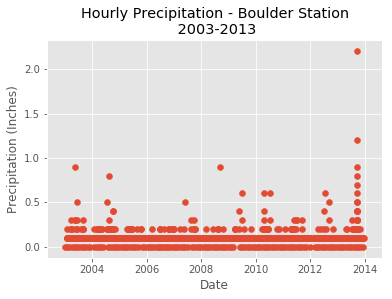

In [13]:
fig, ax = plt.subplots()
ax.scatter(boulder_daily_precip['DATE'].values, boulder_daily_precip['DAILY_PRECIP'].values)
ax.set(xlabel="Date", ylabel="Precipitation (Inches)", title="Hourly Precipitation - Boulder Station\n 2003-2013");

In [1]:
# # plot the data using ggplot2

# prec_plot_daily <- ggplot(data=boulder_daily_precip,  # the data frame

#       aes(DATE, DAILY_PRECIP)) +   # the variables of interest

#       geom_point() +   # create a bar graph

#       xlab("Date") + ylab("Precipitation (Inches)") +  # label the x & y axes

#       ggtitle("Hourly Precipitation - Boulder Station\n 2003-2013")  # add a title



# prec_plot_daily



# ```



<i fa fa-star></i>**Data Tip:**For a more thorough review of date/time classes, see the NEON tutorial

<a href="http://www.neondataskills.org/R/time-series-convert-date-time-class-POSIX/" target="_blank"> *Dealing With Dates & Times in R - as.Date, POSIXct, POSIXlt*</a>.

{: .notice--success}





<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge



Take a close look at the plot.



* What does each point represent?

* Use the `min()` and `max()` functions to determine the minimum and maximum precipitation values for the 10 year span?



</div>



## Subset the Data



If we wanted to zoom in and look at some data over a smaller time period, we can

subset it. Let create a subset of data for the time period around the flood between 15

August to 15 October 2013. We will use the `filter()` function in the `dplyr` package

to do this.



### Introduction to the pipe %<%



Pipes let you take the output of one function and send it directly to the next,

which is useful when you need to do many things to the same data set. Pipes in R

look like %>% and are made available via the `magrittr` package, installed

automatically with `dplyr`.






In [14]:
precip_boulder_AugOct = boulder_daily_precip.query('DATE > "2013-08-15" and DATE <= "2013-10-15"')

In [15]:
# ```{r subset-data}

# # subset 2 months around flood

# precip_boulder_AugOct <- boulder_daily_precip %>%

#                         filter(DATE >= as.Date('2013-08-15') & DATE <= as.Date('2013-10-15'))



# ```




In the code above, we use the pipe to send the `boulder_daily_precip` data through

a filter step. In that filter step, we filter our only the rows withing the

date range that we specified. Since `%>%` takes the object on its left and passes

it as the first argument to the function on its right, we don’t need to explicitly include it as an argument to the `filter()` function.






In [16]:
print(precip_boulder_AugOct['DATE'].min())
print(precip_boulder_AugOct['DATE'].max())

2013-08-21 17:00:00
2013-10-10 18:00:00


In [17]:
# ```{r check-subset, fig.cap="precip plot subset" }

# # check the first & last dates

# min(precip_boulder_AugOct$DATE)

# max(precip_boulder_AugOct$DATE)

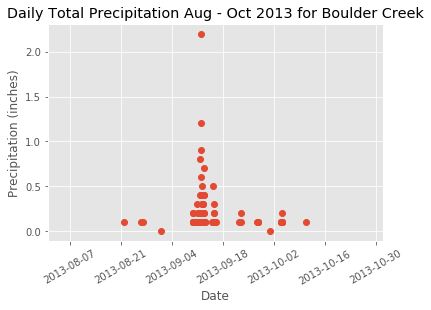

In [18]:
fig, ax = plt.subplots()
ax.plot(precip_boulder_AugOct['DATE'], precip_boulder_AugOct['DAILY_PRECIP'], 'o')
plt.setp(ax.get_xticklabels(), rotation=30)
ax.set(xlabel="Date", ylabel="Precipitation (inches)",
       title="Daily Total Precipitation Aug - Oct 2013 for Boulder Creek",
       xlim=["2013-08-01", "2013-11-01"]);

In [19]:
# # create new plot

# precPlot_flood2 <- ggplot(data=precip_boulder_AugOct, aes(DATE,DAILY_PRECIP)) +

#   geom_bar(stat="identity") +

#   xlab("Date") + ylab("Precipitation (inches)") +

#   ggtitle("Daily Total Precipitation Aug - Oct 2013 for Boulder Creek")



# precPlot_flood2



# ```





<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge



Create a subset from the same dates in 2012 to compare to the 2013 plot.

Use the ylim() argument to ensure the y axis range is the SAME as the previous

plot - from 0 to 10".



How different was the rainfall in 2012?



HINT: type `?lims` in the console to see how the `xlim` and `ylim` arguments work.





</div>




In [20]:
precip_boulder_AugOct_2012 = boulder_daily_precip.query('DATE > "2012-08-15" and DATE <= "2012-10-15"')

 (734716.0, 734808.0),

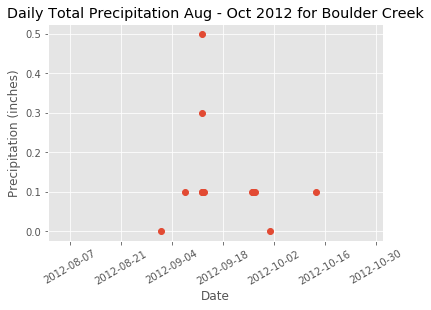

In [21]:
fig, ax = plt.subplots()
ax.plot(precip_boulder_AugOct_2012['DATE'], precip_boulder_AugOct_2012['DAILY_PRECIP'], 'o')
plt.setp(ax.get_xticklabels(), rotation=30)
ax.set(xlabel="Date", ylabel="Precipitation (inches)",
       title="Daily Total Precipitation Aug - Oct 2012 for Boulder Creek",
       xlim=["2012-08-01", "2012-11-01"])

In [22]:
# ```{r challenge, echo=FALSE, warning="hide", fig.cap="precip plot subset 2" }



# # subset 2 months around flood

# precip_boulder_AugOct_2012 <- boulder_daily_precip %>%

#                         filter(DATE >= as.Date('2012-08-15') & DATE <= as.Date('2012-10-15'))



# # create new plot

# precPlot_flood_2012 <- ggplot(data=precip_boulder_AugOct_2012, aes(DATE,DAILY_PRECIP)) +

#   geom_bar(stat="identity") +

#   xlab("Date") + ylab("Precipitation (inches)") +

#   ggtitle("Daily Total Precipitation Aug - Oct 2012 for Boulder Creek") +

#   ylim(0,10)



# precPlot_flood_2012



# ```
